In [1]:
email = "watxaut@gmail.com"

In [2]:
# change dir because notebook is in a child directory of the root directory (and does not find my modules)
import os
import pandas as pd
import matplotlib.pyplot as plt

try:
    os.chdir(r'/Users/joan/code/python/jokes-app')
except FileNotFoundError:
    os.chdir(r'/home/repos/joke-app')
    DB_HOST = "watxaut.com"

import src.api.src.db.core as db
try:
    from src.api.src.db.secret import (
        HOST_OVH as DB_HOST, 
        POSTGRES_USER, 
        POSTGRES_PASSWORD_OVH as POSTGRES_PASSWORD, 
        SCHEMA_NAME
    )
except ImportError:
    from src.api.src.db.secret import POSTGRES_USER, POSTGRES_PASSWORD, SCHEMA_NAME

In [3]:
conn = db.connect(host=DB_HOST, user=POSTGRES_USER, password=POSTGRES_PASSWORD, schema_name=SCHEMA_NAME)

In [4]:
df_mean_user = db.execute_read(conn, """
select 
	um.email, avg(r.rating), count(r)
from 
	ratings as r
left join users_mail as um
on (r.user_id = um.id_hash)
where "source" = 'mail' and um.email is not null
group by um.email
order by count(r.rating) asc
""")

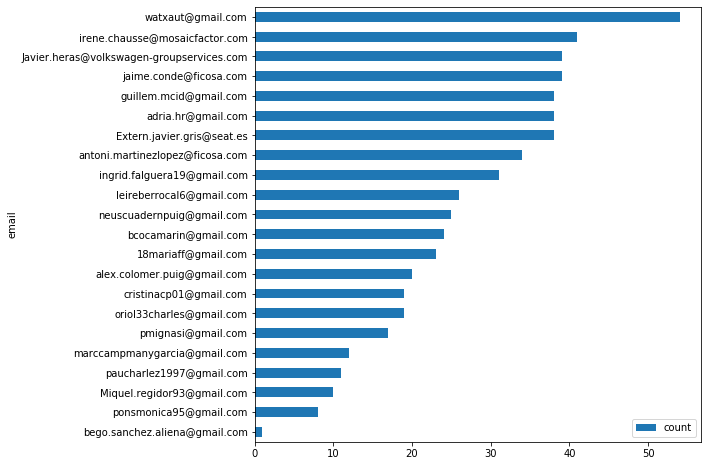

In [7]:
ax = df_mean_user.plot.barh(x="email", y="count", figsize=(8, 8))